In [1]:
%matplotlib inline

In [2]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

## 1. Homogeneous Poisson process generator

1.1 Implement a Poisson process generator, using the numpy.random.exponential
pseudo-random number generator. This function should receive as an input
the parameter $\lambda$, and $T$ the time during which the signal is recorded.

In [3]:
Poisson_generator = np.random.exponential(scale=1/10, size=10)
Poisson_generator

array([0.00223163, 0.05145329, 0.17373678, 0.07635339, 0.04987925,
       0.01008538, 0.01713973, 0.00763174, 0.00351005, 0.00596913])

In [4]:
def poisson_generator(lamb, T): #T -> temps maximal
    valeurs=[]
    while sum(valeurs) < T :
        valeurs.append(np.random.exponential(scale=(1/lamb), size = None))
    return valeurs

In [5]:
poisson_generator(10, 1)

[0.041387187385470925,
 0.01871413939105462,
 0.011518158813824442,
 0.004431337998490523,
 0.1941680182277581,
 0.05183708710454409,
 0.003973623647618381,
 0.3847284435383198,
 0.10538735490258747,
 0.011828324332624419,
 0.02700443588373277,
 0.009274107395816184,
 0.03173391837597016,
 0.02578656316594627,
 0.06047878247201584,
 0.20412718631109647]

1.2. Implement a function that receives as an input a Poisson process realization,
and returns the corresponding counting at a given time $t$.

In [6]:
def poisson_counting(realization, t):
    counter= 0
    my_sum = 0
    while (my_sum <= t):
        my_sum += realization[counter]
        counter += 1
    return (counter)

In [7]:
realization = poisson_generator(10, 50)
poisson_counting(realization, 18)

199

1.3. Implement a function that estimates the $\lambda$ parameter, of a list of Poisson
process realizations, received as input.

1.4. Test the previous function using your Poisson process generator.

In [8]:
def estimate_lambda_homo (P):
    return ( 1/ np.mean(P) )

In [9]:
estimate_lambda_homo( poisson_generator (10, 10))

11.793942935173666

## 2. Modeling spike trains using Poisson process

2.1. Introduction 

Dans cette partie nous souhaitons modéliser des impultions neuronales par un processus de poissons non homogène. L'objectif ici est de comparer des rats étant atteins de parkinson à de rats témoins. Nous avons à disposition les fichiers *SHAM4_replicates.txt* et *SHAM5_replicates.txt* contenant les signaux respectif pour les 2 individus. Les mesures ont été obtenues grâce à une électrode qui simule la région du cortex, et uen autre électrode recevant le signal d'un neurone de la région SNR pendant 1 seconde. L'expérience est répétée 50 fois afin d'avoir plusieurs réplicats par individus. 

Imortation des données :

In [10]:
SHAM4 = []
with open('SHAM4_replicates.txt', 'r') as file:
    for lines in file:
        SHAM4.append([float(e) for e in lines[:-1].split(",")])

In [11]:
SHAM5 = []
with open('SHAM5_replicates.txt', 'r') as file:
    for lines in file:
        SHAM5.append([float(e) for e in lines[:-1].split(",")])

In [12]:
#for experience in SHAM4:
    #print(experience, "\n")

La fonction **epochs** permet de ne garder que les mesures comprise dans l'intervalle ]0, 100] millisecondes. Elle fait également en amont une mise à 0 pour chaque réplicat, c'est à dire qu'on regarde que la différence entre 2 mesures consécutives.

In [13]:
def epochs(array, limit):
    res = []
    for i in range ( len (array) ):
        sublist = []
        for j in range(len(array[i])-1):
            if ( array[i][j+1]-array[i][0] <= limit) :
                sublist.append(array[i][j+1]-array[i][0]) 
        res.append(sublist)
    return (res)

In [14]:
SHAM4_times = epochs(SHAM4, limit = 0.1)
SHAM5_times =  epochs(SHAM5, limit = 0.1)

In [15]:
SHAM4_times

[[0.0012950000000273576,
  0.02786500000001979,
  0.03393999999997277,
  0.059770000000014534],
 [0.0012450000000399086,
  0.003004999999973279,
  0.033979999999985466,
  0.05991000000000213],
 [0.0012999999999578904,
  0.0037499999999681677,
  0.02693499999998039,
  0.03780499999999165,
  0.09466499999996358],
 [0.00130500000000211,
  0.028304999999988922,
  0.04719500000004473,
  0.0901850000000195],
 [0.0006350000000452383,
  0.030300000000011096,
  0.038975000000050386,
  0.07217000000002827],
 [0.0012649999999894135, 0.0307549999999992, 0.0417550000000233],
 [0.0012700000000336331,
  0.027495000000044456,
  0.0338249999999789,
  0.09343499999999949],
 [0.001274999999964166,
  0.028479999999944994,
  0.03460499999999911,
  0.06366499999995767],
 [0.0012799999999515421,
  0.029864999999972497,
  0.046269999999992706,
  0.07438500000000658],
 [0.0012850000000526052,
  0.027825000000007094,
  0.040625000000034106,
  0.07893000000001393],
 [0.001289999999983138, 0.027445000000000164, 0

In [16]:
len(SHAM4_times)

50

Represent in the same plot, the spikes along time, using a different line for
each replicate

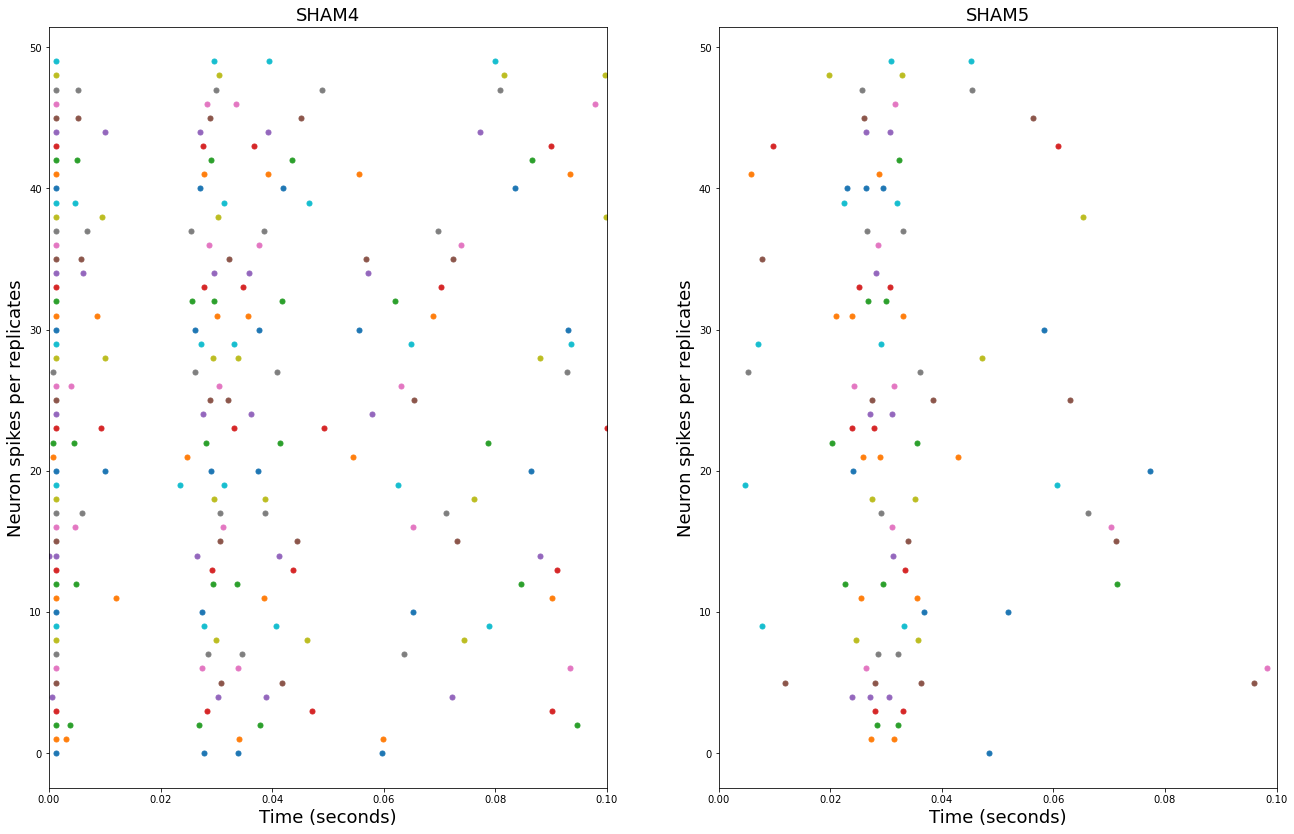

In [17]:
plt.figure(figsize=(22,14))

plt.subplot(1,2,1)
for i, spiketrain in enumerate(SHAM4_times):
        plt.plot(spiketrain, i * np.ones_like(spiketrain), '.', markersize=10)
        
plt.xlim(0, 0.10)
plt.title("SHAM4", fontsize = 18)
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Neuron spikes per replicates", fontsize = 18)

plt.subplot(1,2,2)

for i, spiketrain in enumerate(SHAM5_times):
        plt.plot(spiketrain, i * np.ones_like(spiketrain), '.', markersize=10)
        
plt.xlim(0, 0.10)
plt.title("SHAM5", fontsize = 18)
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Neuron spikes per replicates", fontsize = 18)

plt.show()

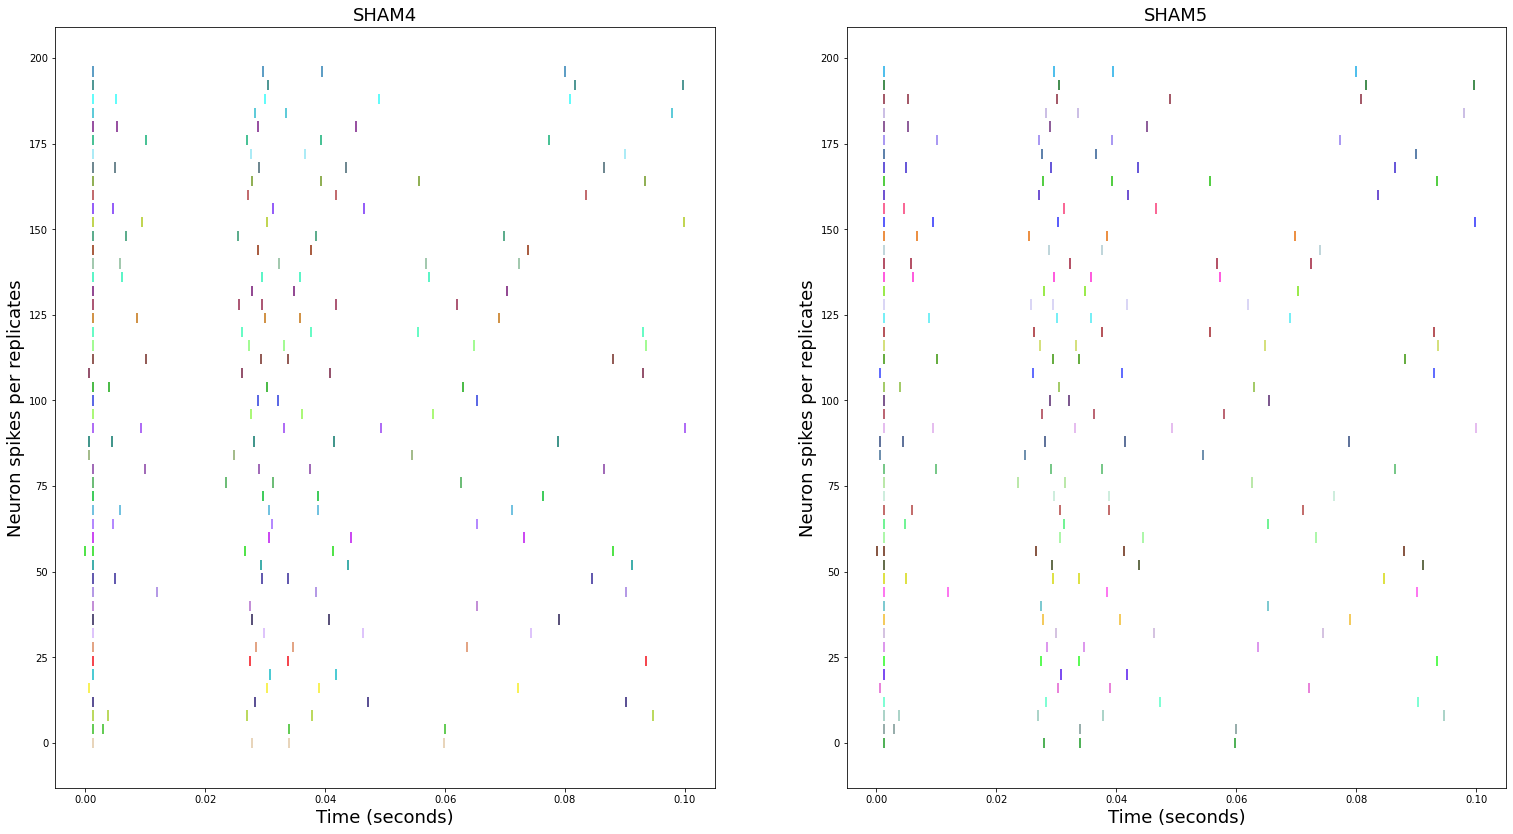

In [18]:
# Autre visualisation avec eventplot() :

plt.figure(figsize=(26,14))

plt.subplot(1,2,1)

colors = [ "#"+"".join([random.choice ("0123456789ABCDEF") for j in range(6)] )
           for i in range (len(SHAM4_times)) ]

plt.eventplot(SHAM4_times, color = colors,  lineoffsets = 4 , linelengths= 3)
plt.title("SHAM4", fontsize = 18)
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Neuron spikes per replicates", fontsize = 18)

plt.subplot(1,2,2)

colors = [ "#"+"".join([random.choice ("0123456789ABCDEF") for j in range(6)] )
           for i in range (len(SHAM5_times)) ]

plt.eventplot(SHAM4_times, color = colors, lineoffsets = 4 , linelengths= 3)
plt.title("SHAM5", fontsize = 18)
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Neuron spikes per replicates", fontsize = 18)

plt.show()

Concatenate the signals and build a histogram,

In [19]:
SHAM4_concat = np.concatenate(SHAM4_times)
SHAM5_concat = np.concatenate(SHAM5_times)

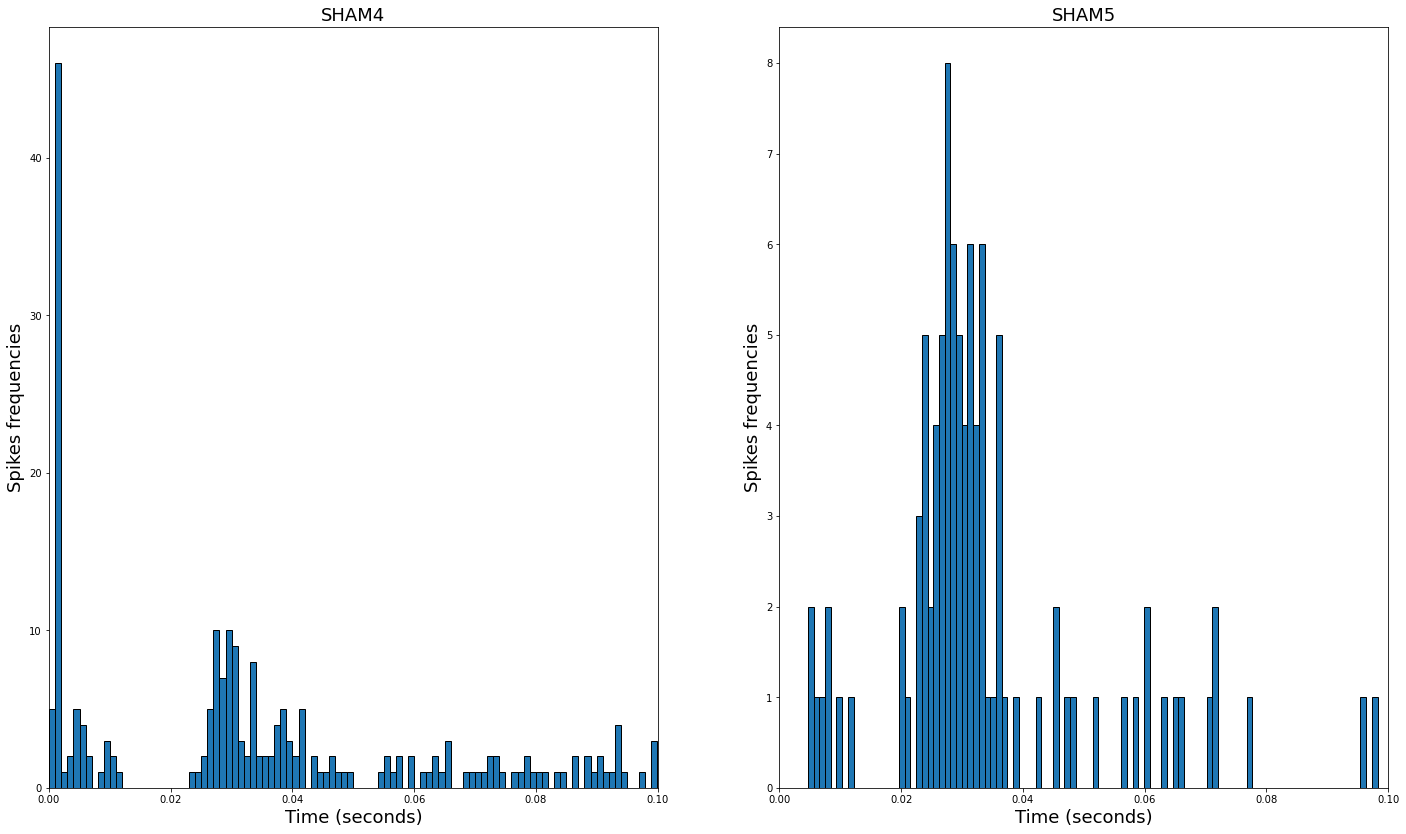

In [20]:
plt.figure(figsize=(24, 14))

plt.subplot(1,2,1)

plt.xlim(0, 0.1)
histogramme = plt.hist(SHAM4_concat, bins= 100, edgecolor="black")
plt.title("SHAM4", fontsize = 18)
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Spikes frequencies", fontsize = 18)

plt.subplot(1,2,2)

plt.xlim(0, 0.1)
histogramme2 = plt.hist(SHAM5_concat, bins= 100, edgecolor="black")
plt.title("SHAM5", fontsize = 18)
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Spikes frequencies", fontsize = 18)

plt.show()

Using the counts produced by the histogram, estimate the rate $\lambda(t)$ at each
interval. To do so, you should use the properties of a Poisson counting
process.

Pour obtenir une fonction continue de $\lambda(t)$ on effectue une interpolation des valeurs issus de l'histogramme.

Étant donnée qu'il s'agit d'un processus de poisson non homogène, nous pouvons estimer lambda sur de petites portions de l'histogramme qui seront approximées comme des processus de poisson homogènes. Nous aurons donc des intervalles de temps de $\frac{0.1}{100}$ avec 100 le nombre de "barres" (bins) dans l'histogramme. On créer avec ceci une liste de valeurs de lambda qui correspondent respectivement à chaque comptage divisé par 50 (nombre de réplicats) et par la taille de l'intervalle ( 0.001 ). 

In [21]:
from scipy.interpolate import interp1d

def estimate_lambda_inhomo (histogram, bins, T, scale = False):
    
    time = np.linspace(1e-10, T, num = bins, endpoint=True)
    counts = histogram[0] / 50 # 50 = nombre de réplicats
    interval_length = T/bins
    lambda_values = counts/interval_length
    
    if (scale == False):
        y = lambda_values
    elif (scale == True):
        y = lambda_values/max(lambda_values) #lambda(t) standardisé entre 0 et 1
        
    interp_lambda = interp1d(time,y, kind = "cubic")
    
    return (time, y, interp_lambda)

In [22]:
x4, y4, f4 = estimate_lambda_inhomo(histogramme, 100, 0.1)
x5, y5, f5 = estimate_lambda_inhomo(histogramme2, 100, 0.1)

On plot les résultats de l'interpolation de la fonction $\lambda(t)$ pour SHAM4 et SHAM5.

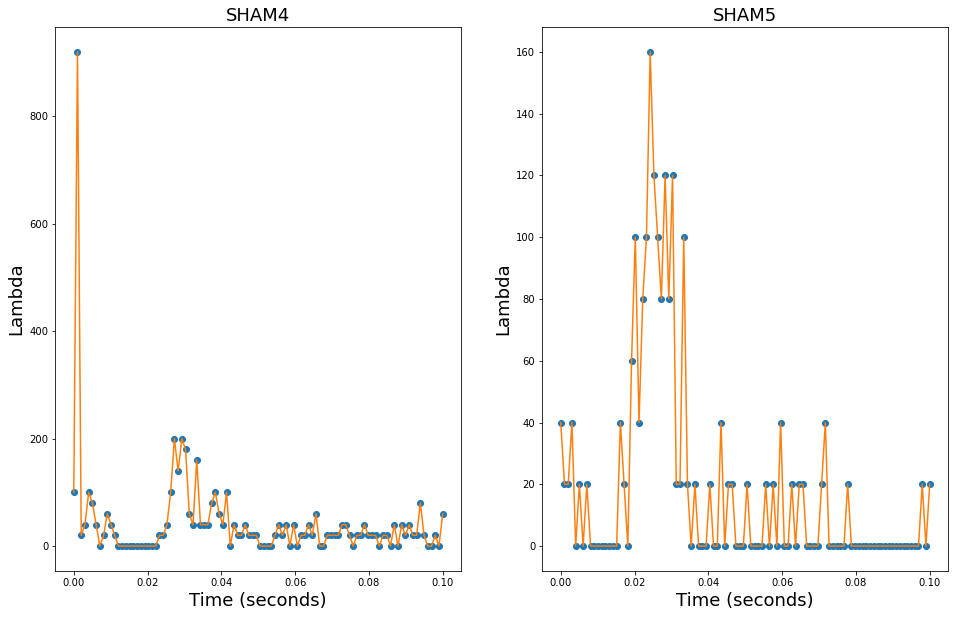

In [23]:
plt.figure(figsize=(16, 10))

plt.subplot(1, 2, 1)
plt.plot(x4, y4, 'o', x4, f4(x4))
plt.title("SHAM4", fontsize = 18)
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Lambda", fontsize = 18)

plt.subplot(1, 2, 2)
plt.plot(x5, y5, 'o', x5, f5(x5))
plt.title("SHAM5", fontsize = 18)
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Lambda", fontsize = 18)

plt.show()

### Non homogeneous poisson process :

$ P_{N_{[t_a, t_b]} } (k) = \frac { \left(  \int_{t_a}^{t_b} \lambda (t) dt   \right) ^ n }{ k!} \times e ^{- \int_{t_a}^{t_b} \lambda (t) dt }$

Propose two methods to simulate the non-homogeneous Poisson process:
one should be intuitive and, the other should rely on the properties of
subdivision of Poisson processes.

#### Méthode intuitive :

In [44]:
def generatorpoisson_inhomogen(my_funct, T):
    start = random.uniform(0, 0.001)
    end = T
    time = start
    time_list = [time]
    while (time < end):
        print(time)
        time += np.random.exponential( scale = 1/ my_funct(time))
        time_list.append(time)
    return (time_list)

On a besoin comme paramètre de la fonction f qui donne l'évolution de λ au fil du temps et du temps maximal T. On prend un temps t au hasard entre 0 et 0.01 qu'on ajoute à une liste de temps. Tant qu'on ne dépasse pas le temps T, on ajoute au temps qu'on avait pris de façon random un temps issu de np.random.exponential de paramètre λ issu de la fonction f rentrée en paramètre. On ajoute ce temps à la liste de temps, et ceci jusqu'à ce qu'on arrive au temps final.

In [25]:
try:
    generatorpoisson_inhomogen(f4, 10)
except ValueError:
    print("Erreur : notre paramètre devient trop petit (proche de 0)")

0.0008750839214915755
0.0017437028058247738
0.00219243651653752
Erreur : notre paramètre devient trop petit (proche de 0)


Mais, le problème de cette fonction est qu'elle donne très peu de valeurs et donne très vite l'infini. En effet, pour la ligne t_temp = t+np.random.exponential(scale=1/f(t)), Python calcule d'abord scale= 1/f(t) et comme f(t) peut avoir des valeurs très faibles, proches de 0, alors le résultat donnera l'infini. Ce n'est donc pas une bonne méthode, essayons la méthode non intuitive.

#### Méthode non - intuitive :

On normalise les valeurs de λ pour avoir des valeurs comprises entre 0 et 1 (on divise par le maximum) et donc on aura comme des probabilités.

In [116]:
scale_x4, scale_y4, proba4 = estimate_lambda_inhomo(histogramme, 100, 0.1, scale=True) #SHAM4
scale_x5, scale_y5, proba5 = estimate_lambda_inhomo(histogramme2, 100, 0.1, scale=True) #SHAM5

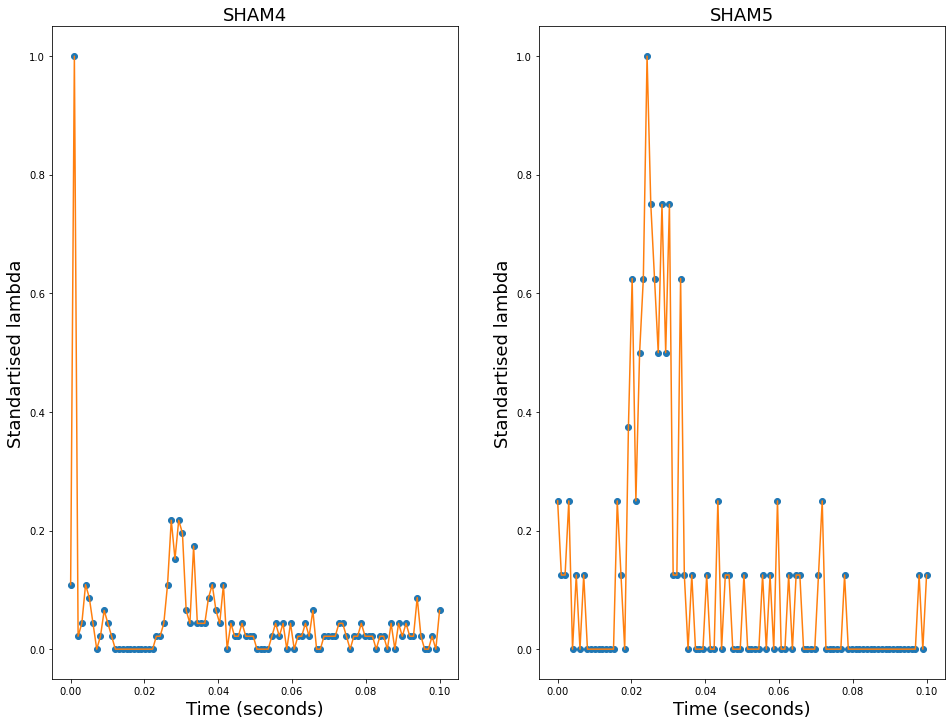

In [124]:
plt.figure(figsize=(16, 12))

plt.subplot(1, 2, 1)
plt.plot(scale_x4, scale_y4, 'o', scale_x4, proba4(scale_x4), '-')
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Standartised lambda", fontsize = 18)
plt.title("SHAM4", fontsize = 18)

plt.subplot(1, 2, 2)
plt.plot(scale_x5, scale_y5, 'o', scale_x5, proba5(scale_x5), '-')
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Standartised lambda", fontsize = 18)
plt.title("SHAM5", fontsize = 18)

plt.show()

On génére un tirage aléatoire homogène d'une loi de poisson pour $\lambda$ = $max(\lambda(t))$:

Dans la fonction *inhomogene_subdivision_poisson_generator* ci - dessous, on crée deux sous listes : les tirages que l'on garde et ceux qu'on jette mais cela va dépendre de la probabilité associée. Si la valeur de probabilité associée est supérieure à une probabilité seuil qu'on a fixé à 0.5, on garde. Sinon, on jette.

In [28]:
def inhomogene_subdivision_poisson_generator (_lambda_, proba, T, list2return = 0):
    generator_list = poisson_generator(_lambda_, T)
    keep_list = [] #ceux qu'on garde
    garbage_list = [] #la poubelle
    proba_limite = 0.5
    
    for i in range(len(generator_list)) : 
        if proba(generator_list[i]) > proba_limite : 
            keep_list.append(generator_list[i])
        else : 
            garbage_list.append(generator_list[i])
            
    if list2return == 0 :
        return (keep_list)
    else :
        return (garbage_list)

In [46]:
# Permet de simuler un nombre N de réplicats pour ce processus afin d'avoir quelque chose
# semblable aux données originelles

def spiketrains_replicator (N, _lambda_, proba, T, list2return):
    new_SHAM = []
    for i in range(N):
        new_SHAM.append(inhomogene_subdivision_poisson_generator ( _lambda_, proba, T, list2return))
        
    return (new_SHAM)

In [30]:
# Calcul le lambda max d'une liste de lambdas issue de l'histogramme précédent
# Utile pour faire une standardisation

def max_lambda(histogram, bins, T):
    counts = histogram[0] / 50 
    interval_length = T / bins
    lambda_values = counts/interval_length
    
    return (max(lambda_values))

#### Notre propre simulation pour SHAM4 :

In [100]:
max_lambda_SHAM4 = max_lambda(histogramme, 100, 0.1)

In [101]:
my_SHAM4_sup = spiketrains_replicator(1000, max_lambda_SHAM4, proba4,  0.1, 0) #keep_list p>0.5
my_SHAM4_inf = spiketrains_replicator(1000, max_lambda_SHAM4, proba4,  0.1, 1) #garbage_list p<0.5

In [102]:
# On concatène (comme vu plus haut)
my_concat_SHAM4_sup = np.concatenate(my_SHAM4_sup)
my_concat_SHAM4_inf = np.concatenate(my_SHAM4_inf)

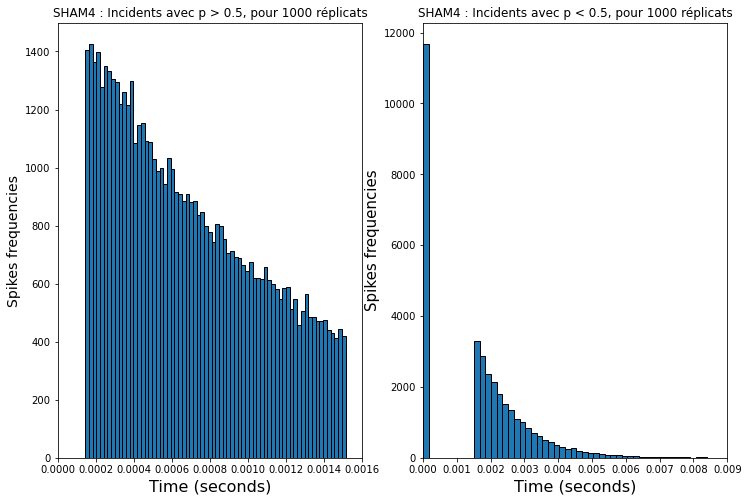

In [133]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
plt.xlim(0.0, 0.0016)
plt.hist(my_concat_SHAM4_sup, bins= 70, edgecolor="black")
plt.title("SHAM4 : Incidents avec p > 0.5, pour 1000 réplicats")
plt.xlabel("Time (seconds)", fontsize = 16)
plt.ylabel("Spikes frequencies", fontsize = 14)

plt.subplot(1,2,2)
plt.xlim(0, 0.009)
plt.hist(my_concat_SHAM4_inf, bins= 70, edgecolor="black")
plt.title("SHAM4 : Incidents avec p < 0.5, pour 1000 réplicats")
plt.xlabel("Time (seconds)", fontsize = 16)
plt.ylabel("Spikes frequencies", fontsize = 15)

plt.show()

#### Pour SHAM5 :

In [107]:
max_lambda_SHAM5 = max_lambda(histogramme2, 100, 0.1)

In [125]:
my_SHAM5_sup = spiketrains_replicator(1000, max_lambda_SHAM5, proba5,  0.1, 0) #keep_list p>0.5
my_SHAM5_inf = spiketrains_replicator(1000, max_lambda_SHAM5, proba5,  0.1, 1) #garbage_list p<0.5

In [126]:
# On concatène (comme vu plus haut)
my_concat_SHAM5_sup = np.concatenate(my_SHAM5_sup)
my_concat_SHAM5_inf = np.concatenate(my_SHAM5_inf)

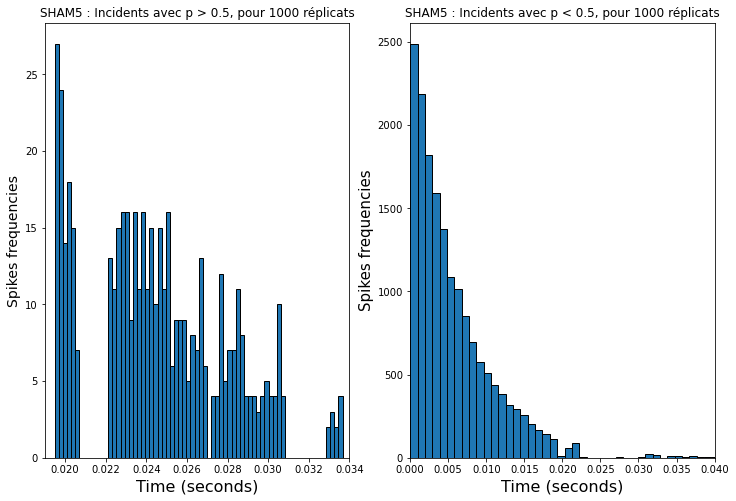

In [134]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
plt.xlim(0.019, 0.034)
plt.hist(my_concat_SHAM5_sup, bins= 70, edgecolor="black")
plt.title("SHAM5 : Incidents avec p > 0.5, pour 1000 réplicats")
plt.xlabel("Time (seconds)", fontsize = 16)
plt.ylabel("Spikes frequencies", fontsize = 14)

plt.subplot(1,2,2)
plt.xlim(0, 0.04)
plt.hist(my_concat_SHAM5_inf, bins= 70, edgecolor="black")
plt.title("SHAM5 : Incidents avec p < 0.5, pour 1000 réplicats")
plt.xlabel("Time (seconds)", fontsize = 16)
plt.ylabel("Spikes frequencies", fontsize = 15)

plt.show()

Nos histogrammes pour SHAM4 ne ressemblent pas vraiment à celui vu plus haut. Peut être que cela est dû aux différents paramètres que nous avons fixés au cours de notre porcessus comme les probabilités par exemple...

On observe toutefois que l'individu SHAM5 semble prendre un chemin plus long (indirect path) entre le cortex et SNR tandis que l'individu SHAM4 prendrait un chemin plus court (hyperdirect path).

## FIN

### Bonus : Expériences un peu hors sujet (mais intéressantes):

#### Méthode intuitive :

In [49]:
# On definit notre fonction lambda(t) pour la simulation non-homogène
# (Choix arbitraire de la fonction)

def my_function(x):
    y =  math.log(0.5*x) - 0.9*math.cos(x) + math.exp(-0.825*x) - 0.25*x/2 +0.4
    return ( abs(y) )# car lambda doit appartenir à R*+

In [75]:
# On génére une processus de poisson non homogène 
# Avec comme paramètre notre fonction lambda définie plus haut

def poisson_inhm_generator(T):
    time = np.linspace(1e-6, 10, T) 
    spikes = []
    lambda_ = []
    
    for t in time:
        lambda_.append( (my_function(t)) )
        
    for l in lambda_:
        spikes.append( sorted ( abs( (np.random.exponential(1/l, T) ) ) ) )
        
    return (spikes, lambda_)

In [69]:
spikes, lambda1 = poisson_inhm_generator(100)
spikes_times = epochs(spikes, limit=0.1)
spikes_times2 = sorted( np.concatenate (spikes_times) )

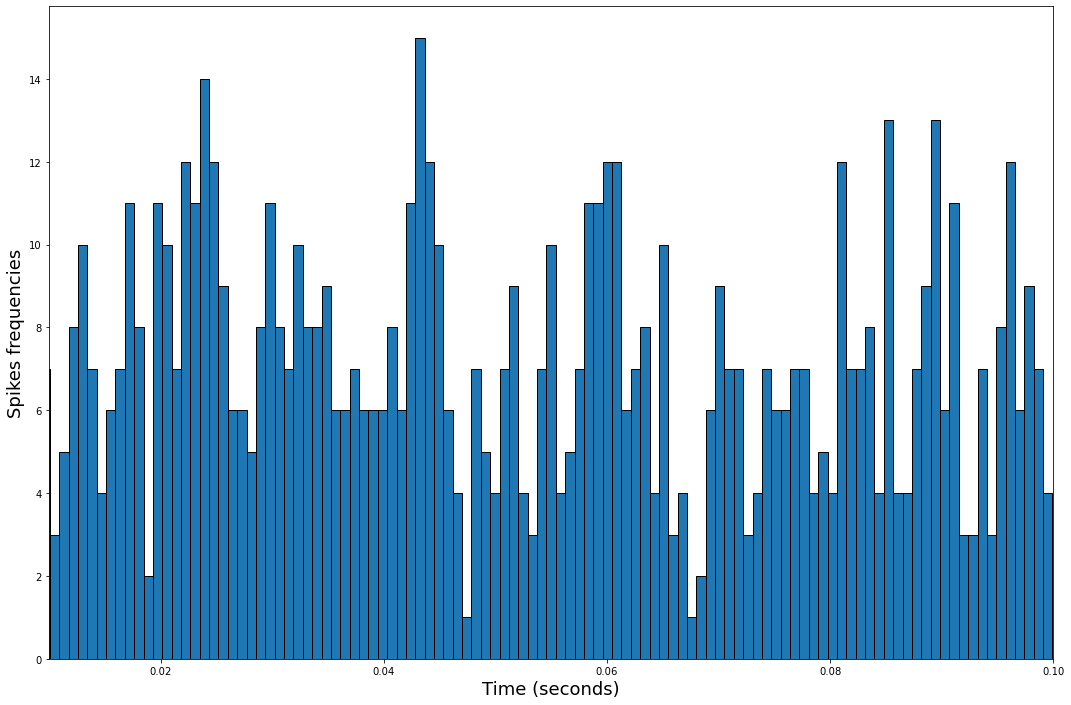

In [72]:
bins = np.linspace(1e-6, max(spikes_times2), 120)
plt.figure(figsize=(18, 12))
plt.xlim(0.01, 0.1)
plt.xlabel("Time (seconds)", fontsize = 18)
plt.ylabel("Spikes frequencies", fontsize = 18)
plt.hist(spikes_times2, bins = bins , edgecolor = "black" )

plt.show()

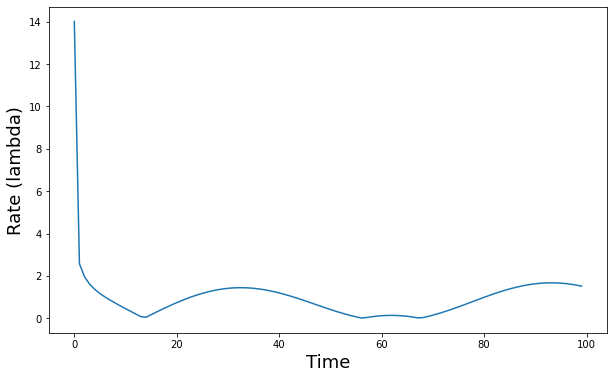

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(lambda1)
plt.xlabel("Time", fontsize = 18)
plt.ylabel("Rate (lambda)", fontsize = 18)
plt.show()

#### Méthode non - intuitive :

( J'ai surement fait des confusions donc à prendre avec des pincettes :) )

Cette méthode est basée sur la subdivision d'un processus de poisson. Nous avons un premier processus dont les tirages suivent une loi de Bernouilli de probabilité $p$, 

A chaque temps $t$ on effectue 100 tirages selon une loi de Bernouilli de probabilité $p$, $p$ étant aléatoire à chaque tirage et $p \in [0,1]$. On compte ensuite le nombre de réussite (1) et le nombre d'échecs (0) que l'on va stocker à chaque itération dans une liste *eventsP* pour le nombre de réussites et *eventsQ* pour les échecs. 

In [39]:
from scipy.stats import bernoulli
from collections import Counter

In [78]:
time = np.linspace(1e-6, 10, 100)
p_list = np.linspace(0, 1, 100)
eventsP = [] # nb de succés p
eventsQ = [] # nb echecs 1-p = q
probas = []

for t in time:
    p = round(random.choice(p_list), 3)
    rvs =  bernoulli.rvs(p, size = 100)
    probas.append(p)
    eventsP.append(Counter(rvs)[1]) 
    eventsQ.append(Counter(rvs)[0])

print("Les probabilites p : ", probas, "\n") 
print("Nombre de succes : ", eventsP, "\n") 
print("Nombre d'echecs : ", eventsQ)

Les probabilites p :  [0.222, 0.485, 0.859, 0.929, 0.798, 0.354, 0.818, 0.747, 0.071, 0.747, 0.889, 0.677, 0.566, 0.172, 0.465, 0.727, 0.333, 0.02, 0.576, 0.192, 0.333, 0.172, 0.131, 0.576, 0.202, 0.616, 0.616, 0.96, 0.727, 0.667, 0.889, 0.687, 0.303, 0.646, 0.182, 0.697, 0.606, 0.717, 0.152, 0.818, 0.535, 0.313, 0.232, 0.818, 0.677, 0.616, 0.949, 0.909, 0.263, 0.162, 0.707, 0.444, 0.152, 0.717, 0.162, 0.747, 0.525, 0.919, 0.202, 0.929, 0.657, 0.02, 0.313, 0.081, 0.626, 0.657, 1.0, 0.525, 0.798, 0.04, 0.01, 0.121, 0.111, 0.465, 0.758, 0.545, 0.242, 0.192, 0.727, 0.687, 0.677, 0.465, 0.657, 0.505, 0.485, 0.232, 0.141, 0.242, 0.283, 0.232, 0.364, 0.848, 0.091, 0.596, 0.535, 0.364, 0.111, 0.212, 0.596, 0.061] 

Nombre de succes :  [24, 56, 83, 95, 75, 35, 83, 69, 5, 76, 86, 67, 49, 16, 41, 73, 33, 3, 51, 20, 32, 16, 10, 52, 24, 63, 59, 95, 72, 70, 79, 69, 28, 66, 23, 77, 56, 72, 15, 85, 50, 40, 17, 86, 67, 67, 97, 92, 26, 17, 71, 50, 15, 71, 12, 78, 48, 91, 17, 93, 62, 3, 30, 12, 62, 71, 

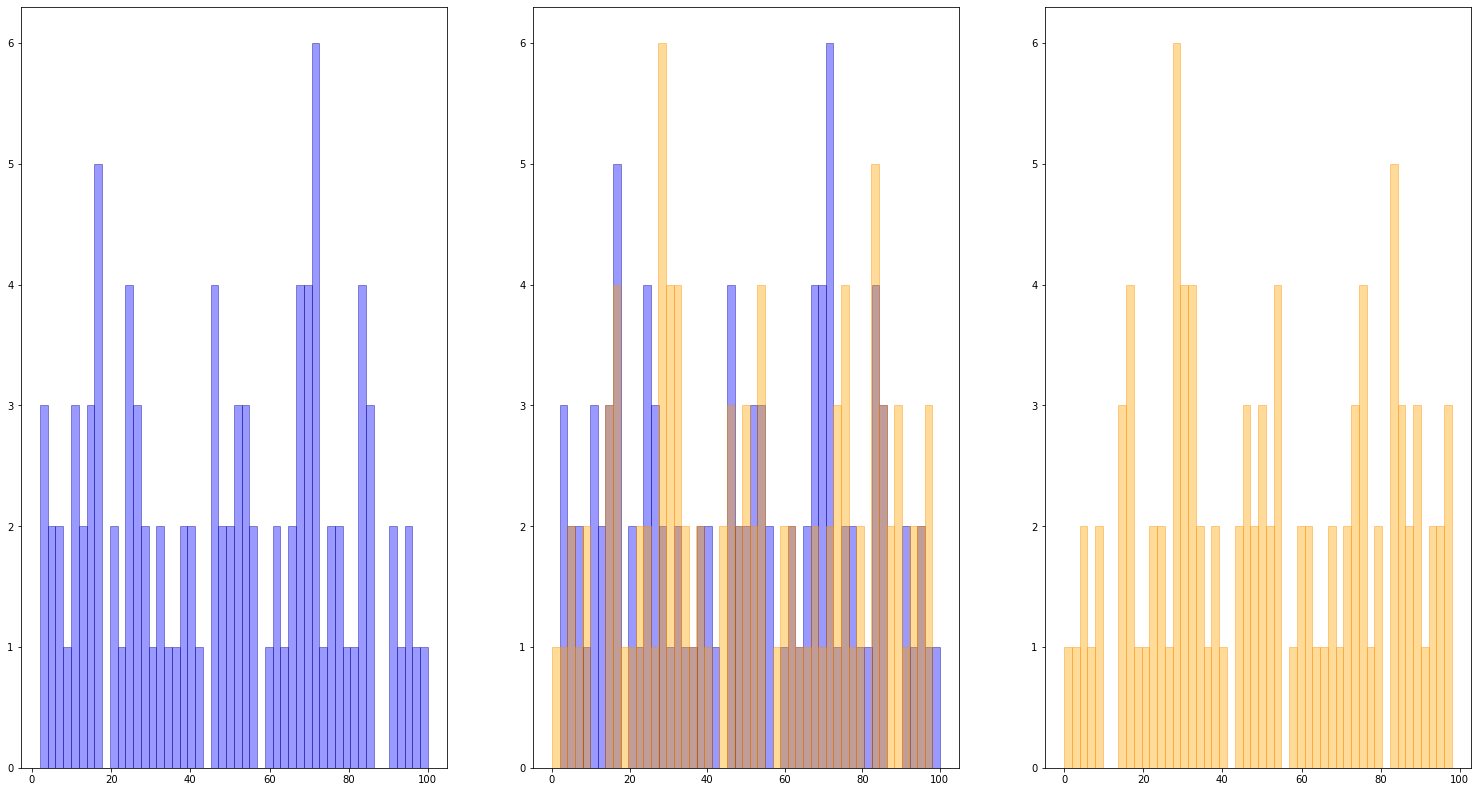

In [79]:
plt.figure(figsize=(26, 14))

plt.subplot(1,3,1)
plt.hist(eventsP, alpha=0.4, bins = 50, color = "blue", edgecolor = "darkblue")

plt.subplot(1,3,2)
plt.hist(eventsP, alpha=0.4, bins = 50, color = "blue", edgecolor = "darkblue")
plt.hist(eventsQ, alpha = 0.4, bins = 50, color = "orange", edgecolor = "darkorange")

plt.subplot(1,3,3)
plt.hist(eventsQ, alpha = 0.4, bins = 50, color = "orange", edgecolor = "darkorange")

plt.show()

In [80]:
lambda_ = 0.5
lambdaP = []
lambdaQ = []

for p in probas:
    lambdaP.append(lambda_ * p)
    lambdaQ.append(lambda_ * (1- p))

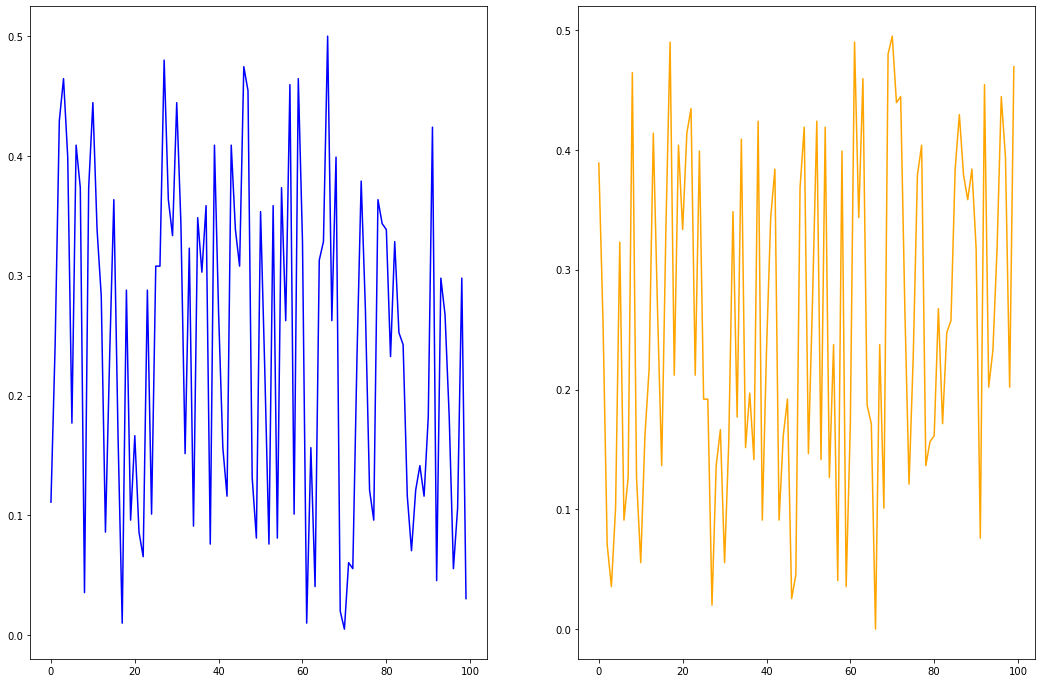

In [81]:
plt.figure(figsize=(18, 12))

plt.subplot(1,2,1)
plt.plot(lambdaP, color = "blue")

plt.subplot(1,2,2)
plt.plot(lambdaQ, color="orange")

plt.show()

Ces résultats n'étant pas vraiment exploitables dans le cadre du TP, je pense m'être égaré dans ma réflexion...